
# Frame Extraction and Displaying Images in New Window

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

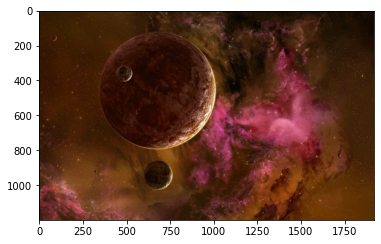

In [2]:
img = cv.imread('transition.jpg')

plt.imshow(img)

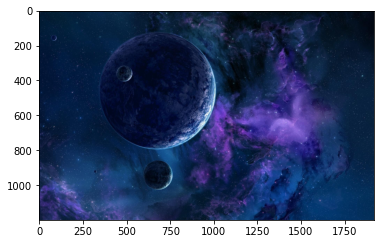

In [3]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

Before starting Frame Extraction, we should learn how to crop images. For the same transition image if we check its shape it would be something like this:

In [4]:
img.shape

(1200, 1920, 3)

We can crop an image just by using basic slicing img[ : , : , : ]  this can be used to print the full image. In order to crop the image lets say we only want to print first 500 rows and 700 columns we can slice the image as img[ :500, : 1000 , : ] to plot this cropped image we can use 

plt.imshow(img[ :500, : 1000 , : ])

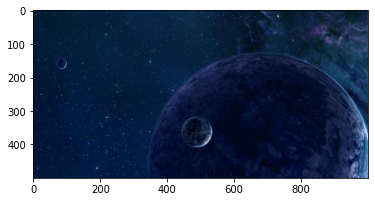

In [5]:
plt.imshow(img[ :500, : 1000 , : ])

In [6]:
Red = img[ : , : , :0]  #0 from the colour channel to extract Red

Green = img[ : , : , :1] #1 from the colour channel to extract Green

Blue = img[ : , : , :2] #2 from the colour channel to extract Blue

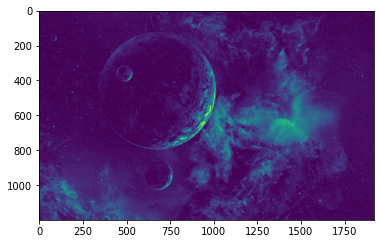

In [7]:
plt.imshow(Green)

# Working with webcam

We will use the function VideoCapture() which is a part of cv2 library and is used to capture frames inside the function we will pass the value 0 if we are using inbuilt camera or 1 2 3 depending in which port did you connected your external camera in most cases 1 will work. 

Let’s get started with displaying frames using web cams.

In [ ]:
cam = cv.VideoCapture(0) #0 because I’m using internal camera of my laptop
while True: #We used an infinite loop so that I can display video instead of images in the window
  _, img = cam.read() #_ is a boolean variable that returns true if the frame is available and img is an image array vector captured based on the default frames per second defined explicitly or implicitly
  cv.imshow("frame",img)
  key = cv.waitKey(1) #delay of 1ms
  if (key == 27):   #27 is ASCII for esc
    cam.release()
    break

### Cropping a video window is similar to cropping a plotted image, like we used slicing to crop a plotted image we can similarly use slicing to crop a video window. 
### crop = img [ : , : , : ]                 #[horizontal, vertical, channel]

### To flip an image what we mean is to flip the image that is shown in the window. To flip an image, we will use a function known as flip() flip takes 2 arguments: 1 the image and second whether to flip the image horizontally or vertically. 

### img = cv2.flip(img , 0) # 0 means horizontal flip 
### img = cv2.flip(img , 1)      # 1 means vertical flip

In [ ]:
cam = cv.VideoCapture(0)

while True:

    _, img = cam.read()
    img = cv.flip(img, 1) 

    frame = img[ 100:500 , 400:800 , : ]
    
    cv.imshow("Frame",img)
    cv.imshow("Cropped",frame)
    
    key = cv.waitKey(20)
    
    
    if (key == 27):
        cam.release()
        break

### HSV stands for Hue, Saturation and Value. 

### Hue defines the main dominating colour
### Saturation defines how bright the colours are in the video 
### Value will tell us basically how dark the colour is in darkness

In [8]:
cam = cv.VideoCapture(0)

while True:

    _, img = cam.read()
    
    img = cv.flip(img, 1) 
    hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
    
    #RGB Extraction
    r = img[:,:,0]
    g = img[:,:,1]
    b = img[:,:,2]
    
    #HSV Extraction
    h = hsv[:,:,0]
    s = hsv[:,:,1]
    v = hsv[:,:,2]

    #RGB Frame Display
    cv.imshow("Frame",img)
    cv.imshow("Red"  ,r)
    cv.imshow("Green",g)
    cv.imshow("Blue" ,b)
  
    #HSV Frame Display    
    cv.imshow("HSV"  ,hsv)
    cv.imshow("Hue"  ,h)
    cv.imshow("Saturation",s)
    cv.imshow("Value",v)
    
    key = cv.waitKey(20)
    
    
    if (key == 27):
        cam.release()
        break

# Selfies with OpenCV

### To click a selfie and save it, remember that the ASCII of enter is 13. It is important as we are going to use the enter key to click our photo.

### We can take a selfie using basic if condition:

This piece of code can be used to take a selfie. The image will be saved in your current working directory.

We can also take a Black and White and HSV image by using:

gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

hsv   = cv.cvtColor(img, cv.COLOR_RGB2HSV)

and then cv.write for both gray and hsv.

In [9]:
cam = cv.VideoCapture(0)
while True:

    _, img = cam.read()
    
    img = cv.flip(img, 1) 
    
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    hsv  = cv.cvtColor(img, cv.COLOR_RGB2HSV)
   
    cv.imshow("Frame",img)
    
    key = cv.waitKey(20)
    
    if (key == 13):
        
        cv.imwrite('Selfie.png', img)
        cv.imwrite('Selfie_Gray.png', gray)
        cv.imwrite('Selfie_HSV.png', hsv)
        cam.release()
        
        break


# Multiple Selfies with OpenCV

#### By multiple selfies we mean that each time we press enter we could click a selfie and won’t release the camera seems pretty easy right, But the main problem here is the name of selfie as each time we press enter we would end up with only one image taken at last as it would overwrite the previous image every time enter is pressed due to naming conflict. So, we have to click a selfie in such a way that whenever we press enter a selfie is clicked and a name is dynamically given to it. So, the next time we press enter another selfie is clicked and saved with a different name.

To achieve this dynamic naming, we use a variable ‘c’ every time enter is pressed the value of c gets incremented by 1. Therefore, each image will have a different name

In [16]:
cam = cv.VideoCapture(0)

c = 1

while True:

    _, img = cam.read()
    
    img = cv.flip(img, 1) 
   
    cv.imshow("Frame",img)
    
    key = cv.waitKey(30)
    
    if (key == 13):     # Click selfie if Enter is pressed
        cv.imwrite('Selfie/Selfie_' + str(c) + '.png', img) #Dynaic Name given to Each new selfie
        c += 1
    
    
    if (key == 27):  # Terminate the program if Escape is Pressed
        cam.release()
        break
        